<a href="https://colab.research.google.com/github/tapiaer22/Analysis_Project_1/blob/main/Wheat_Seeds_Classification_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import classification_report

Our data is in .txt format, and it uses tabs and spaces (\t and \s+) to separate its columns. Therefore, we need to include the separator for spaces (\s+) to read the csv and gather the data.

Source: https://archive.ics.uci.edu/dataset/236/seeds

In [ ]:
cols = ["area","perimeter","compactness","length","width","asymmetry","groove","class"]
df = pd.read_csv("seeds_dataset.txt", names=cols, sep="\s+")
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


We will first visualize the data using histograms. The source mentions that there were 3 different values for the feature "class":

Kama (**type 1**), Rosa (**type 2**), and Canadian (**type 3**).

These are the classes of the roses the data was gathered from.

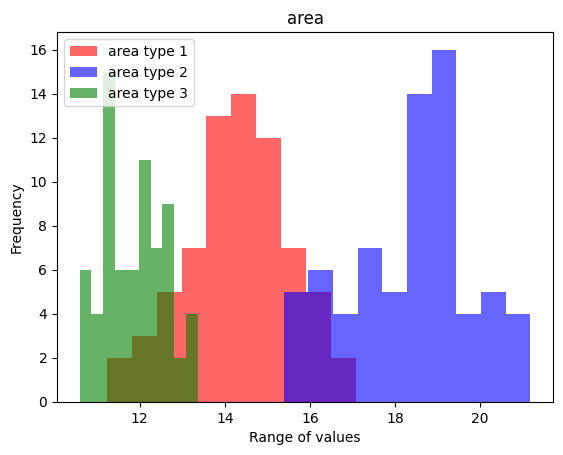

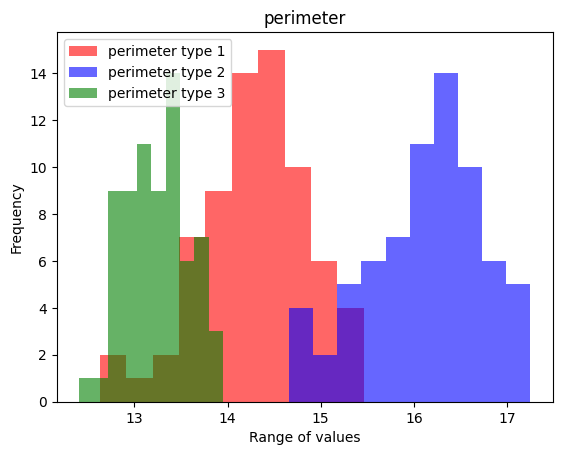

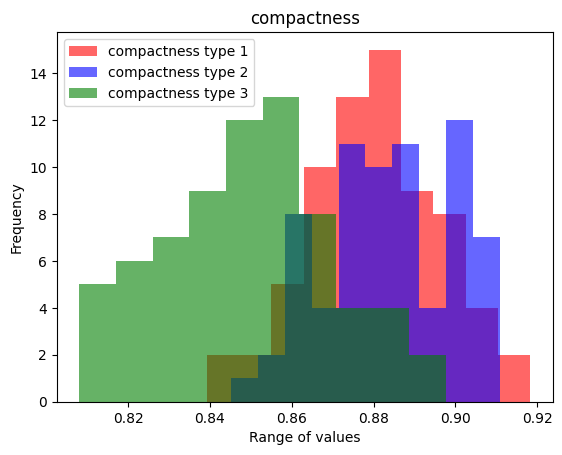

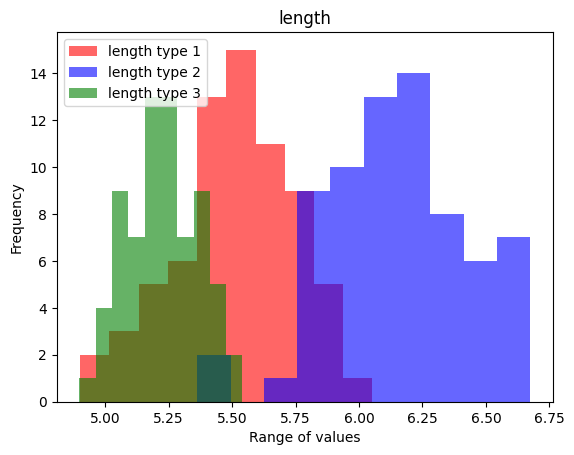

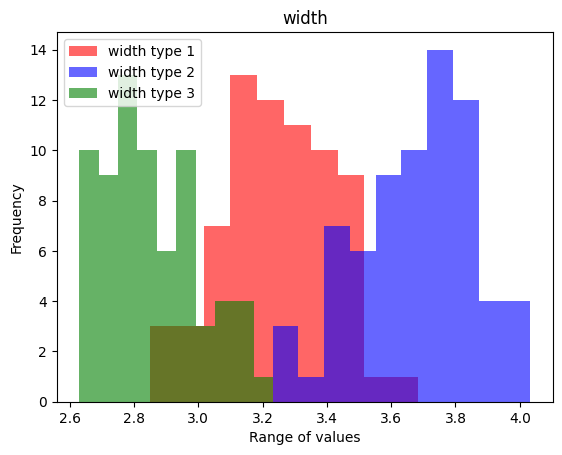

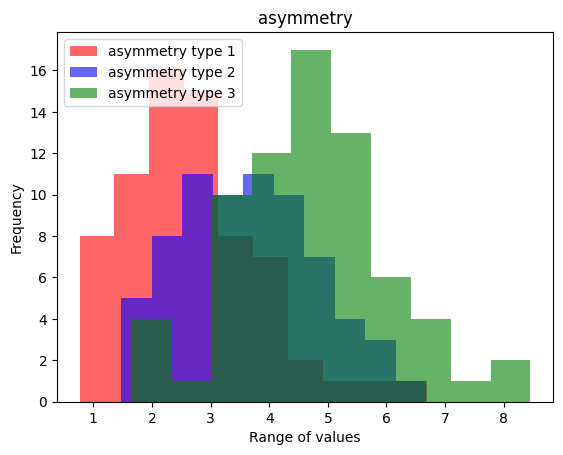

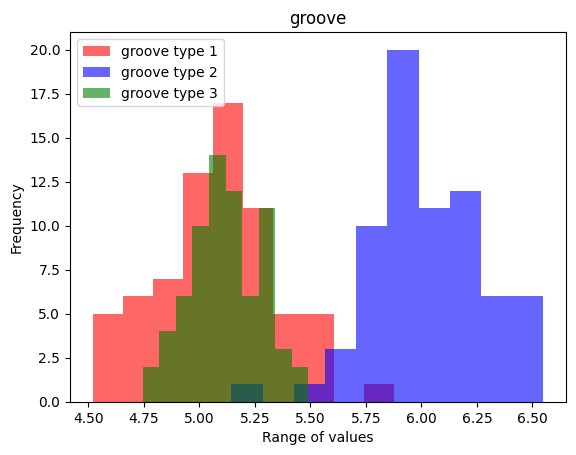

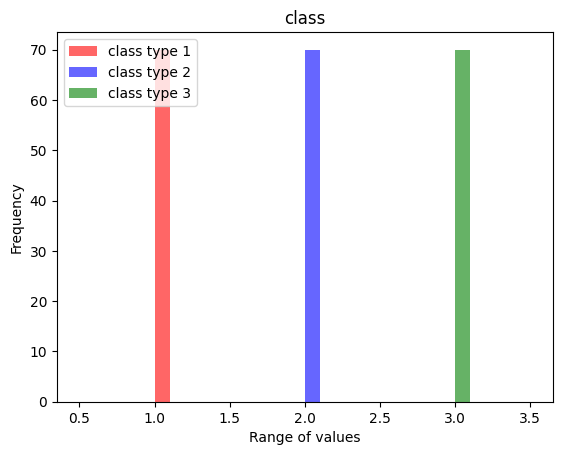

In [ ]:
for x in cols[:len(cols)]:
  plt.hist(df[df["class"]==1][x], color="red", alpha=.6, label=f"{x} type 1")
  plt.hist(df[df["class"]==2][x], color="blue", alpha=.6, label=f"{x} type 2")
  plt.hist(df[df["class"]==3][x], color="green", alpha=.6, label=f"{x} type 3")
  plt.xlabel("Range of values")
  plt.ylabel("Frequency")
  plt.title(f"{x}")
  plt.legend(loc="upper left")
  plt.savefig(f"{x} Histogram")
  plt.show()

#SECTION 1: Hypothesis Testing for distributions

In this section, we will test the distributions within each feature for differences in classes of roses.

For example, if we look at the histogram from feature "area", we will test if:

- The distributions are normal.
- They come from different populations (difference of means)

---
##SECTION 1.1: Testing for normality
We will use 2 types of tests for normality:
- Test1 --> D’Agostino and Pearson’s (dap)
- Test2 --> Kolmogorov-Smirnov (ks)


In [ ]:
alpha = 0.05/2  #Set alpha for 2 sided hypothesis

#Function that returns pvalues of normality tests and may print results
def ks_test_normality(data, mean, std, PRINT=True):
  test1 = stats.normaltest(data)   #Normal test based on D’Agostino and Pearson’s
  test2 = stats.kstest(data,cdf = stats.norm(loc=mean,scale=std).cdf)   #KS test for a normal distribution (specified mean and standard deviation)
  if PRINT == True: #Print test results
    print(test1)
    print(test2)
  return test1[1], test2[1] #Return pvalues for test1 and test2, respectively


Based on a few test results, test1 seems to be more accurate on telling whether the selected distribution follows a normal distribution or not. Nevertheless, for the sake of this project, we will see how well both tests perform. In the context of our normality tests:
- H0 (Null Hypothesis): The distribution is normal
- Ha (Alternative Hypothesis): The distribution is not normal

Hence, if our pvalue >= 0.025 then we will go with the null hypothesis that the distribution is normal

In [ ]:
data_dict = {'variables': [],
             'class': [],
             'pvalue_dap': [],
             'pvalue_ks': [],
             'normality': []}

#Test if all distributions are normal
for variable in cols[:-1]:  #Get the independent variables
  #Classify the types within the variable
  data1 = df[df['class'] == 1][variable]  #Kama (Type1)
  data2 = df[df['class'] == 2][variable]  #Rosa (Type2)
  data3 = df[df['class'] == 3][variable]  #Canadian (Type3)
  #Test for normality
  pvalue1 , pvalue_ks1 = ks_test_normality(data1, mean=data1.mean(), std=data1.std(), PRINT=False)
  pvalue2 , pvalue_ks2 = ks_test_normality(data2, mean=data2.mean(), std=data2.std(), PRINT=False)
  pvalue3 , pvalue_ks3 = ks_test_normality(data3, mean=data3.mean(), std=data3.std(), PRINT=False)
  #Store results in dictionary
  data_dict['variables'].extend([variable,variable,variable])
  data_dict['class'].extend([1,2,3])
  data_dict['pvalue_dap'].extend([pvalue1,pvalue2,pvalue3])
  data_dict['pvalue_ks'].extend([pvalue_ks1, pvalue_ks2, pvalue_ks3])
  data_dict['normality'].extend(['normal' if pvalue1 >= alpha else 'not normal',
                                 'normal' if pvalue2 >= alpha else 'not normal',
                                 'normal' if pvalue3 >= alpha else 'not normal'])

#Show results as a dataframe
normality_results = pd.DataFrame(data_dict)
normality_results

,variables,class,pvalue_dap,pvalue_ks,normality
0,area,1,0.661122,0.863511,normal
1,area,2,0.318500,0.246098,normal
2,area,3,0.044938,0.428378,normal
3,perimeter,1,0.245543,0.949578,normal
4,perimeter,2,0.351365,0.540834,normal
5,perimeter,3,0.671772,0.918432,normal
6,compactness,1,0.997839,0.992861,normal
7,compactness,2,0.223754,0.565934,normal
8,compactness,3,0.657696,0.989672,normal
9,length,1,0.465380,0.889134,normal


INTERACTIVE CODE

Use the code below to check for a variable's histogram and boxplot

mean: 6.0206 ; std: 0.25393376975166154
median: 5.9815000000000005
kurtosis: 1.119620071887514
skewness: -0.34660488203630074
ShapiroResult(statistic=0.9708361029624939, pvalue=0.10163712501525879)


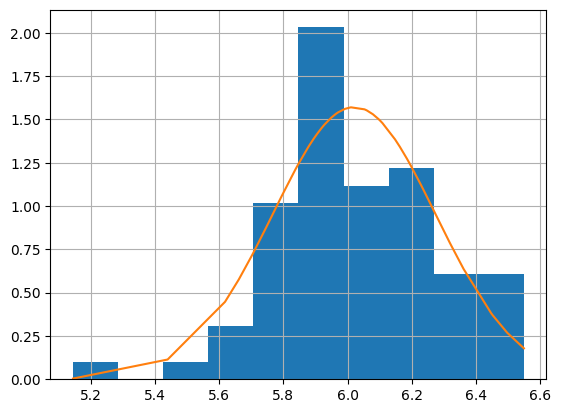

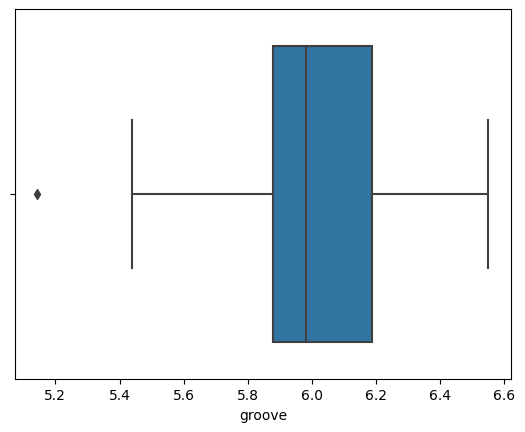

In [ ]:
the_class = 2   #Change for class (either 1, 2, or 3)
the_variable = 'groove'   #Change for variable (either area, perimeter, asymmetry, compactness, groove, length, perimeter, or width)

df1 = df[df['class'] == the_class][the_variable]
print('mean:', df1.mean(), '; std:', df1.std())
print('median:', df1.median())
print('kurtosis:', df1.kurtosis())
print('skewness:', df1.skew())
print(stats.shapiro(df1))
df1.hist(density=True)
plt.plot(df1.sort_values(),stats.norm.pdf(df1.sort_values(),loc=df1.mean(),scale=df1.std()))
plt.show()
sns.boxplot(x=df1)
plt.show()

NOTE: normality in this project will be based on the pvalue obtained from the DAP test (test1).

As you can see in the table, test2 shows pvalues that are all over the place given that alpha = 0.05/2 = 0.025. This is because the ks test (test1) is not sensitive on values that are close to the tails of the distribution. Instead, the ks test is more sensitive in values that are closer to the mean, and this aspect makes it less sensitive to skewed data. In this project, we want the test to be more sensitive to skewed data, so we will go with test1.

There was only 1 graph that failed to pass the normality test (asymmetry 1), so we will not take that distribution into account for the t-tests.

In [ ]:
#Remove those that failed normality
normal_results = normality_results[normality_results['normality'] == 'normal']
normal_results

,variables,class,pvalue_dap,pvalue_ks,normality
0,area,1,0.661122,0.863511,normal
1,area,2,0.318500,0.246098,normal
2,area,3,0.044938,0.428378,normal
3,perimeter,1,0.245543,0.949578,normal
4,perimeter,2,0.351365,0.540834,normal
5,perimeter,3,0.671772,0.918432,normal
6,compactness,1,0.997839,0.992861,normal
7,compactness,2,0.223754,0.565934,normal
8,compactness,3,0.657696,0.989672,normal
9,length,1,0.465380,0.889134,normal


NOTE: Even though one distribution failed the normality test, we could include that same distribution in the tests IF we were to normalize it with a transformation or by replacing the extreme outliers with the mean. However, this project has the purpose to perform hypothesis testing based on the normality tests AND use code for other complex scenarios such as filtering data.
In fact, T-tests are considered to be 'fairly robust' with data that deviates from being normal [(source here)](https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/1471-2288-12-78#:~:text=It%20is%20fairly%20robust%20to,heavily%20skewed%20distributions%20%5B5%5D), but a different procedure will be taken with this project.


##SECTION 1.2: 2-sample T-Test for difference of means

After getting the normal distributions from the data, we will test for all possible combinations of pairs for differences in means WITHIN a specified variable.

Example: all 'normal classes' in variable 'asymmetry': class 2 vs class 3

Example: all 'normal classes' in variable 'perimeter': class 1 vs class 2, class 1 vs class 3, class 2 vs class 3


area 1 vs area 2
H0: area1(14.3344)  = area2(18.3343)
Ha: area1(14.3344) != area2(18.3343)
pvalue: 4.698866415638335e-37
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


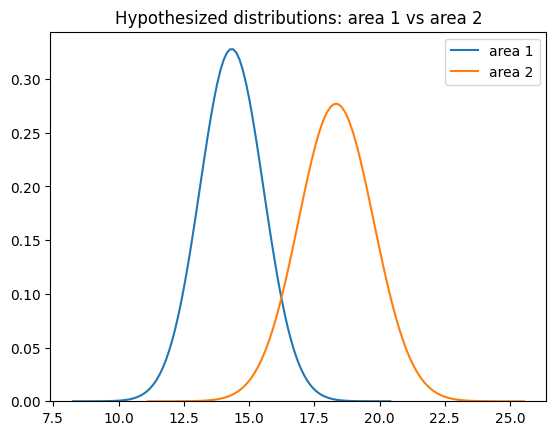


area 1 vs area 3
H0: area1(14.3344)  = area3(11.8739)
Ha: area1(14.3344) != area3(11.8739)
pvalue: 1.2895904585433412e-27
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


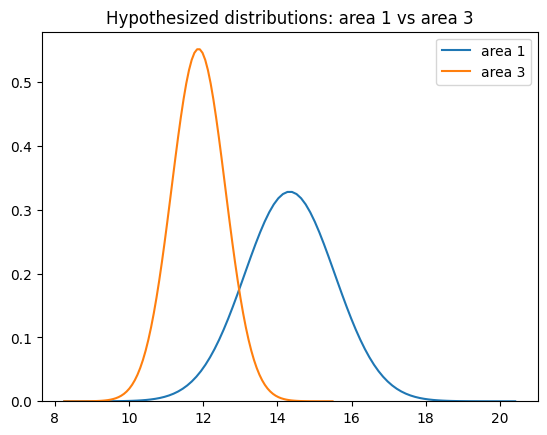


area 2 vs area 3
H0: area2(18.3343)  = area3(11.8739)
Ha: area2(18.3343) != area3(11.8739)
pvalue: 7.92359164997502e-57
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


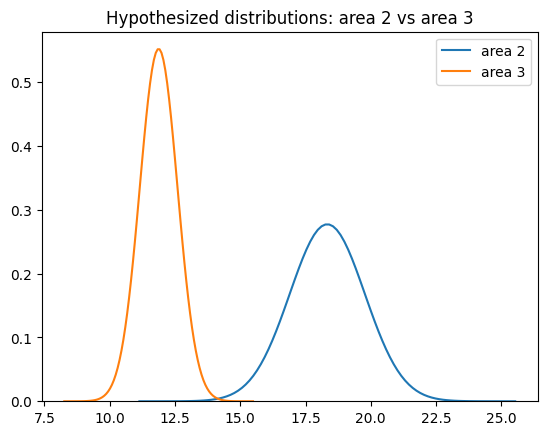


perimeter 1 vs perimeter 2
H0: perimeter1(14.2943)  = perimeter2(16.1357)
Ha: perimeter1(14.2943) != perimeter2(16.1357)
pvalue: 1.586237613304045e-38
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


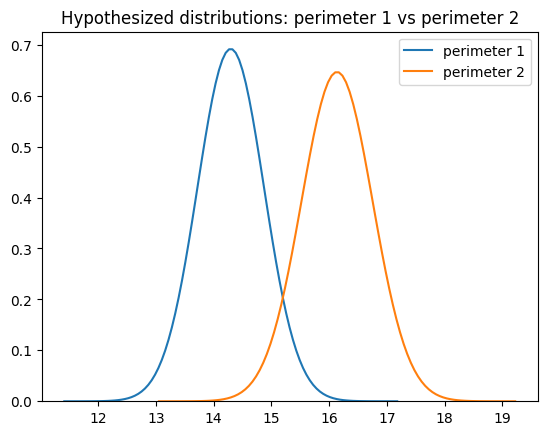


perimeter 1 vs perimeter 3
H0: perimeter1(14.2943)  = perimeter3(13.2479)
Ha: perimeter1(14.2943) != perimeter3(13.2479)
pvalue: 2.8053202690802924e-24
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


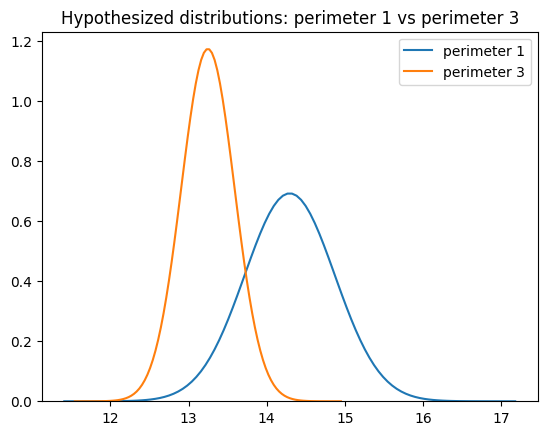


perimeter 2 vs perimeter 3
H0: perimeter2(16.1357)  = perimeter3(13.2479)
Ha: perimeter2(16.1357) != perimeter3(13.2479)
pvalue: 1.1183614944904427e-59
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


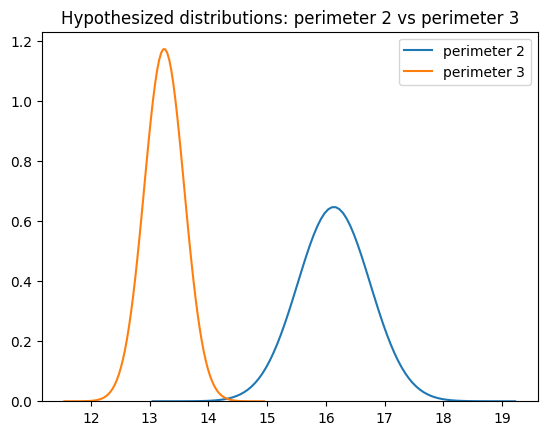


compactness 1 vs compactness 2
H0: compactness1(0.8801)  = compactness2(0.8835)
Ha: compactness1(0.8801) != compactness2(0.8835)
pvalue: 0.20034972618306887
alpha: 0.025
Since the pvalue is greater than our alpha: 0.025, 
we will FAIL to reject our null hypothesis


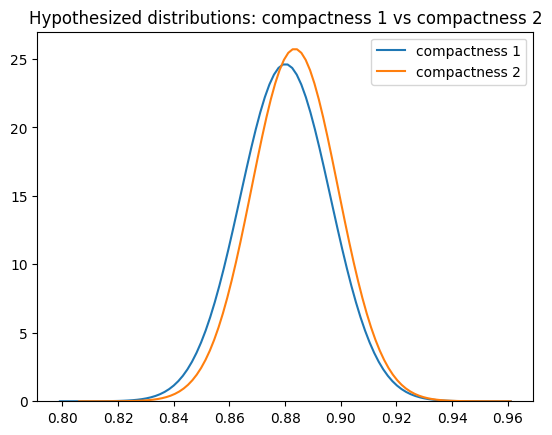


compactness 1 vs compactness 3
H0: compactness1(0.8801)  = compactness3(0.8494)
Ha: compactness1(0.8801) != compactness3(0.8494)
pvalue: 2.0835288769280682e-16
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


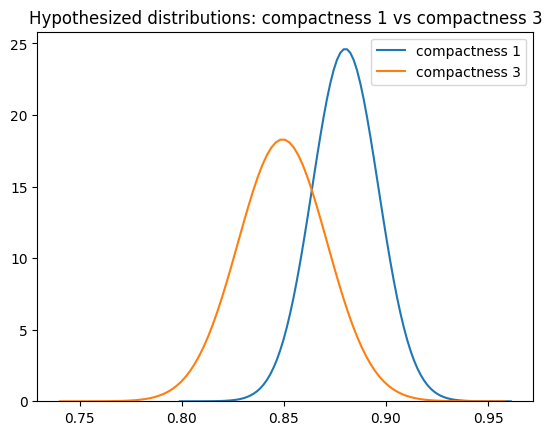


compactness 2 vs compactness 3
H0: compactness2(0.8835)  = compactness3(0.8494)
Ha: compactness2(0.8835) != compactness3(0.8494)
pvalue: 2.612793833604244e-19
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


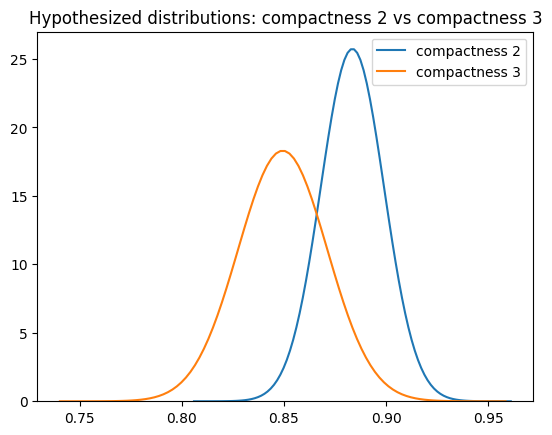


length 1 vs length 2
H0: length1(5.5081)  = length2(6.148)
Ha: length1(5.5081) != length2(6.148)
pvalue: 7.888858866584394e-31
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


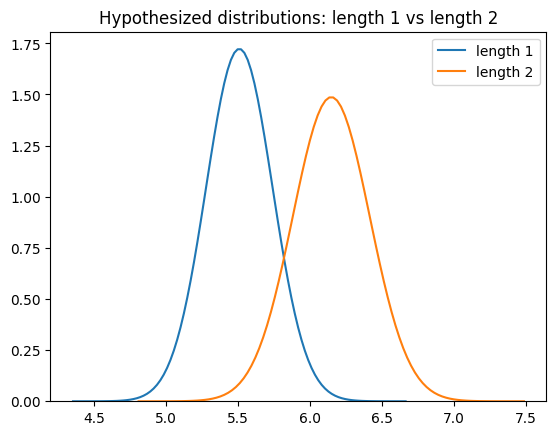


length 1 vs length 3
H0: length1(5.5081)  = length3(5.2295)
Ha: length1(5.5081) != length3(5.2295)
pvalue: 4.170159743730718e-14
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


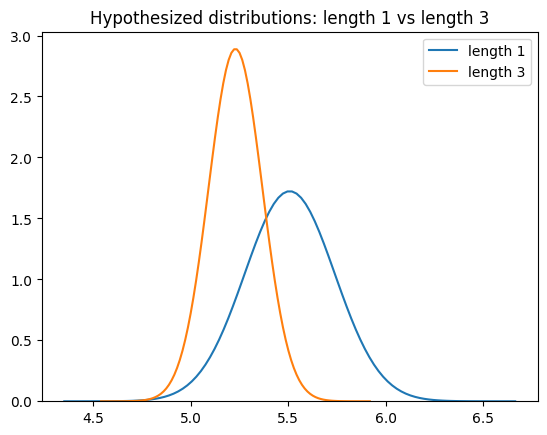


length 2 vs length 3
H0: length2(6.148)  = length3(5.2295)
Ha: length2(6.148) != length3(5.2295)
pvalue: 2.6293476191340164e-46
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


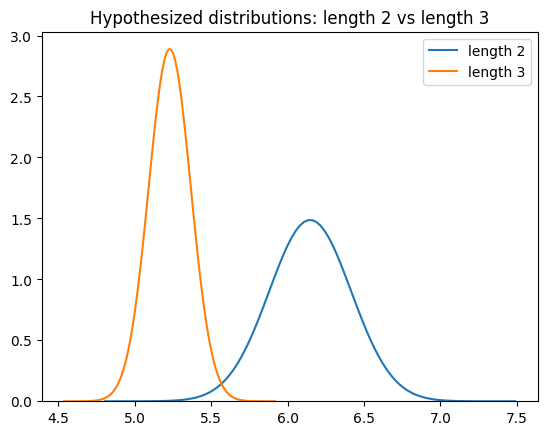


width 1 vs width 2
H0: width1(3.2446)  = width2(3.6774)
Ha: width1(3.2446) != width2(3.6774)
pvalue: 1.6959231774295464e-28
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


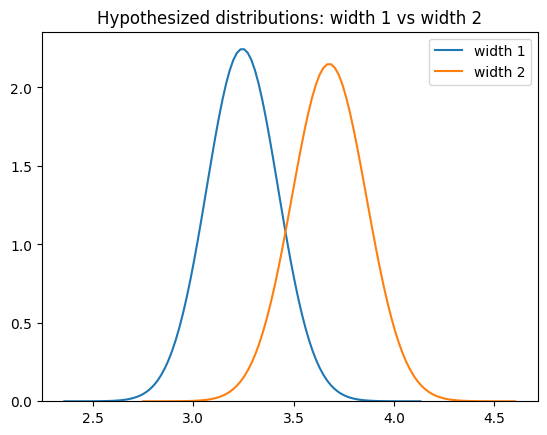


width 1 vs width 3
H0: width1(3.2446)  = width3(2.8538)
Ha: width1(3.2446) != width3(2.8538)
pvalue: 2.258211362670581e-28
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


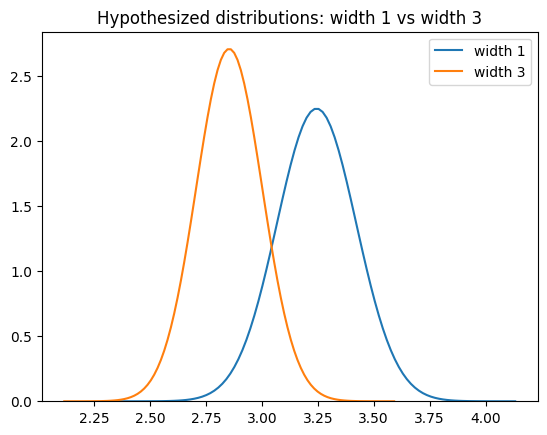


width 2 vs width 3
H0: width2(3.6774)  = width3(2.8538)
Ha: width2(3.6774) != width3(2.8538)
pvalue: 4.5542958524467895e-59
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


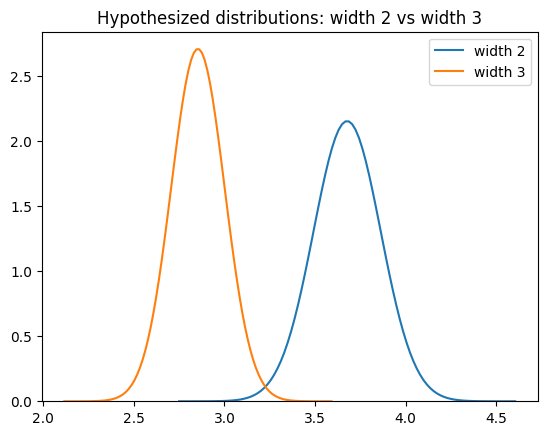


asymmetry 2 vs asymmetry 3
H0: asymmetry2(3.6448)  = asymmetry3(4.7884)
Ha: asymmetry2(3.6448) != asymmetry3(4.7884)
pvalue: 3.4208397771665894e-07
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


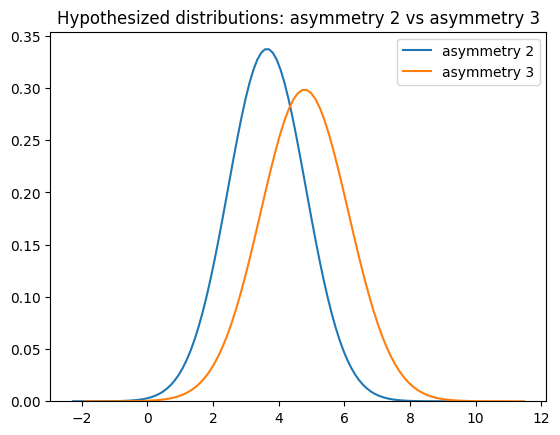


groove 1 vs groove 2
H0: groove1(5.0872)  = groove2(6.0206)
Ha: groove1(5.0872) != groove2(6.0206)
pvalue: 1.6832251990109337e-45
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


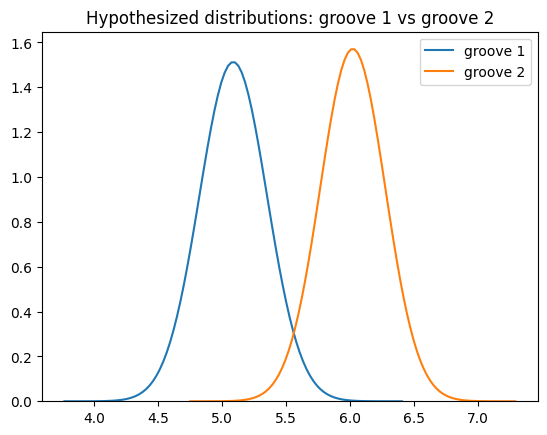


groove 1 vs groove 3
H0: groove1(5.0872)  = groove3(5.1164)
Ha: groove1(5.0872) != groove3(5.1164)
pvalue: 0.43179127946940365
alpha: 0.025
Since the pvalue is greater than our alpha: 0.025, 
we will FAIL to reject our null hypothesis


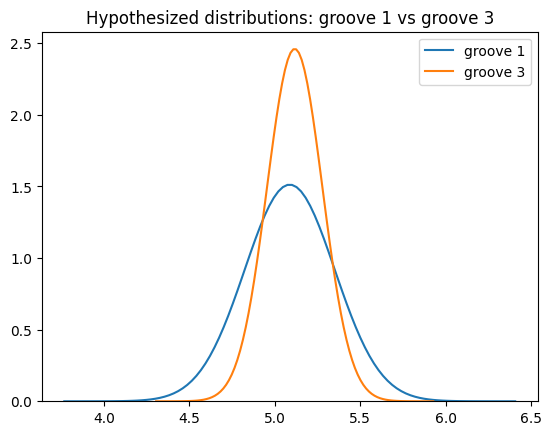


groove 2 vs groove 3
H0: groove2(6.0206)  = groove3(5.1164)
Ha: groove2(6.0206) != groove3(5.1164)
pvalue: 5.4161496445478075e-49
alpha: 0.025
Since the pvalue is less than or equal than our alpha: 0.025, 
we will REJECT our null hypothesis


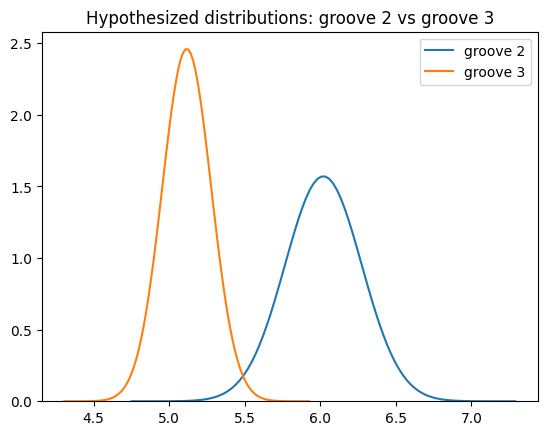

In [ ]:
#We will use combinations to test for all possibilities WITHIN variables
from itertools import combinations

data_dict = {'population1': [],
             'population2': [],
             'pvalue': [],
             'result_H0': []}

#Loop through variables for hypothesis testing
for variable in normal_results['variables'].unique():
  #We will get all possible combinations in pairs of 2
  test_comb = list(combinations(normal_results[normal_results['variables'] == variable]['class'],2))
  #For each pair, perform the respective t-test and display info
  for x in test_comb:
    m1 = round(df[df['class'] == x[0]][variable].mean(),4)   #First mean value of pair
    m2 = round(df[df['class'] == x[1]][variable].mean(),4)   #Second mean value of pair
    std1 = round(df[df['class'] == x[0]][variable].std(),4)  #First standard deviation of pair
    std2 =  round(df[df['class'] == x[1]][variable].std(),4) #Second standard deviation of pair
    #Print the hypotheses
    print(f"\n{variable} {x[0]} vs {variable} {x[1]}")
    print(f"H0: {variable}{x[0]}({m1})  = {variable}{x[1]}({m2})")
    print(f"Ha: {variable}{x[0]}({m1}) != {variable}{x[1]}({m2})")
    #Perform t-test
    _, pvalue = stats.ttest_ind(df[df['class'] == x[0]][variable],df[df['class'] == x[1]][variable], equal_var=False)
    print(f"pvalue: {pvalue}\nalpha: {alpha}")
    #Save decision (REJECT or FAIL)
    data_dict['population1'].extend([f"{variable}{x[0]}"])
    data_dict['population2'].extend([f"{variable}{x[1]}"])
    data_dict['pvalue'].extend([pvalue])
    #Print decision
    if pvalue <= alpha:
      print(f"Since the pvalue is less than or equal than our alpha: {alpha}, \nwe will REJECT our null hypothesis")
      data_dict['result_H0'].extend(['reject'])
    else:
      print(f"Since the pvalue is greater than our alpha: {alpha}, \nwe will FAIL to reject our null hypothesis")
      data_dict['result_H0'].extend(['fail'])
    #Draw hypothesized distributions
    domain1 = np.linspace(m1-5*(std1),m1+5*(std1),100)
    domain2 = np.linspace(m2-5*(std2),m2+5*(std2),100)
    plt.plot(domain1,stats.norm.pdf(domain1,loc=m1,scale=std1), label=f'{variable} {x[0]}')
    plt.plot(domain2,stats.norm.pdf(domain2,loc=m2,scale=std2), label=f'{variable} {x[1]}')
    plt.title(f"Hypothesized distributions: {variable} {x[0]} vs {variable} {x[1]}")
    plt.ylim(bottom=0)
    plt.legend()
    plt.show()


We will visualize the results in the table below as well

In [ ]:
#Display results of 2-sample T-tests
results = pd.DataFrame(data_dict)
results

,population1,population2,pvalue,result_H0
0,area1,area2,4.698866e-37,reject
1,area1,area3,1.289590e-27,reject
2,area2,area3,7.923592e-57,reject
3,perimeter1,perimeter2,1.586238e-38,reject
4,perimeter1,perimeter3,2.805320e-24,reject
5,perimeter2,perimeter3,1.118361e-59,reject
6,compactness1,compactness2,2.003497e-01,fail
7,compactness1,compactness3,2.083529e-16,reject
8,compactness2,compactness3,2.612794e-19,reject
9,length1,length2,7.888859e-31,reject


##SECTION 1.3: Conclusions based on statistical evidence and data

After completing:

- A test for normality in multiple ditributions
- Filtering between normal and non-normal distributions
- Applying 2-sample T-tests for differences of means between distributions of classes within specific variables
- Obtaining statistical results and evidence, such as pvalues, to make conclusions
- Identifying which hypotheses to reject

What can we say about our data?

First, from statistical-significant evidence in normality tests, we can easily compare the difference of classes given a feature variable by performing T-tests since all distributions, with one exception, are normal.

Recall that in the context of this project, the hypotheses for the 2-sample T-tests were as follows:

- H0: group 1  = group 2
- Ha: group 1 != group 2

After applying 2-sample T-test for independence between distributions within each given variable--for example, given the variable 'area', comparing class 1 (Kama) vs class 3 (Canadian)--we obtained p-values that were extremely low. This showed reasonable evidence to reject the null hypotheses for 17 out of 19 cases.

In context, rejecting the null hypothesis would imply that there is statistically significant evidence to say there is a difference between the 2 groups that we were comparing. This also helps with the task of classification:

- If there exist a difference with statistical significance between the means of two groups, that is to get a p-value less than alpha in the 2-sample T-test, then we would be able to reasonably say that the groups are indeed different in terms of the measured variable. A statistically significant difference implies that it would be easier to distinguish the class of the sample.

- If we want to classify the classes of wheat given that they can be Kama, Rosa, or Canadian, then we can efficiently predict the class of wheat by measuring area, perimeter, length, or width since these are the variables that had evident differences between them. In other words, the more significant the difference between 2 groups, the easier it will be to tell from which class the sample came from, specially for the variables like area.

  With compactness, on the other hand, it is very hard to tell the difference between type 1 and type 2. The p-value for the test was greater than alpha, which resulted in the failure to reject the null hypothesis: there is no difference between the 2 tested groups. This could sound misleading, but if we carefully interpet the result, it means that there is not a statistical significant difference *in compactness* between the tested groups. In probability words, if you were to randomly measure the compactness of a sample, you won't be able to tell if the sample is from type 1 or type 2. You could, though, tell the difference from type 3 since it showed to be different compared to both, type 1 and type 2.

Based on the results that we got in this project, we can be highly confident to conlcude that the classes of wheat are different from each other in many aspects and measured variables. The area, perimeter, length and width were the most notable differences, whereas compactness and groove had similarities between some classes in the variables.


---
#SECTION 2: Machine Learning (PCA and K-means)

In this section, we will use Machine Learning to classify samples and predict their classes based on multiple features. In this model, we will implement K-means clustering to identify the clusters of the classes. Afterwards, we will use PCA (Principal Component Analysis) to reduce the number of dimensions from 7 to 2, where most of the variance should be explained by the components (at least 90%).

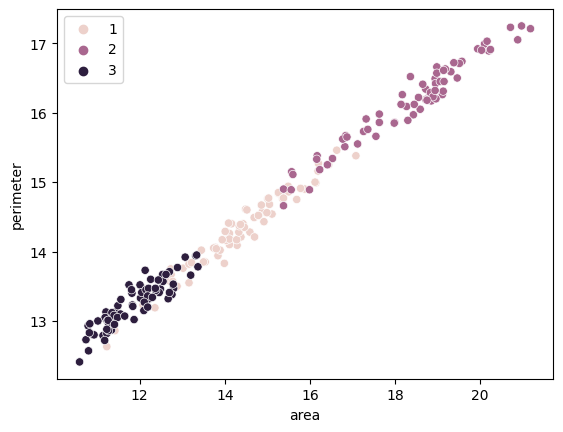

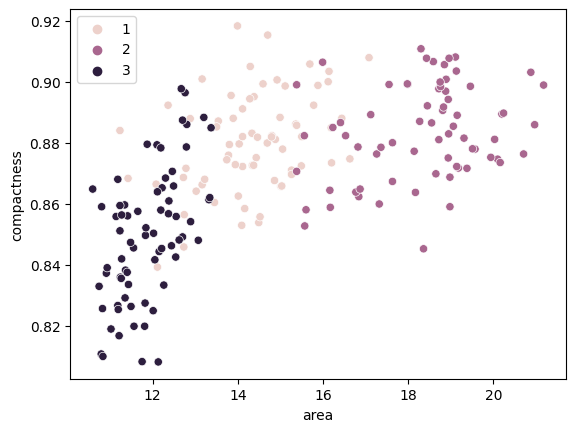

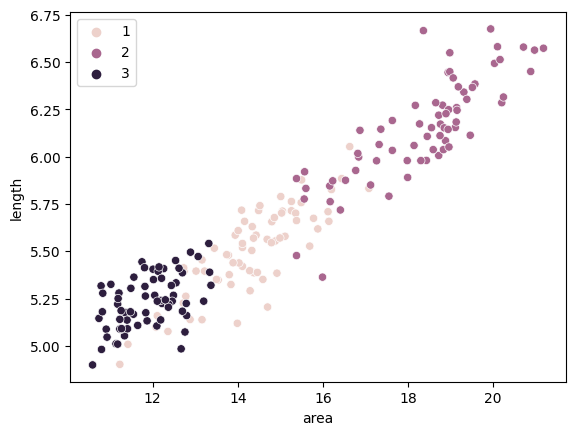

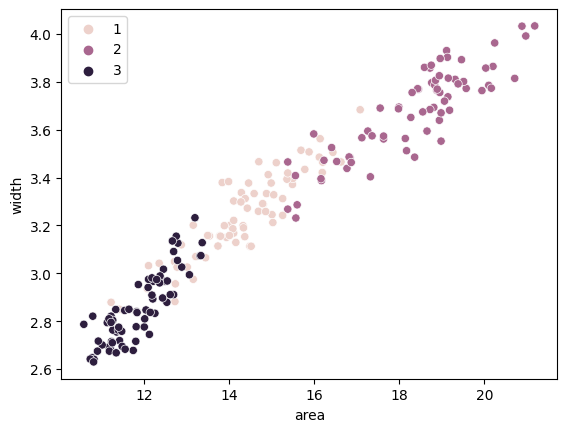

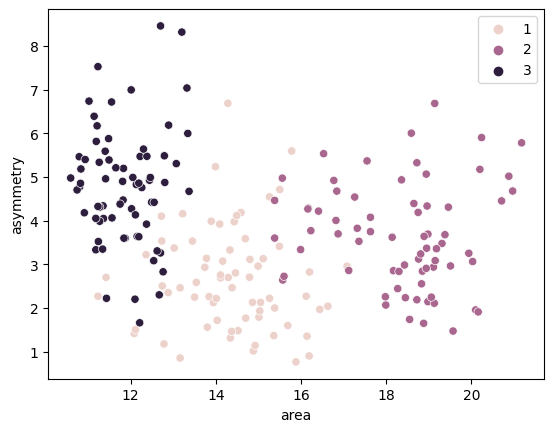

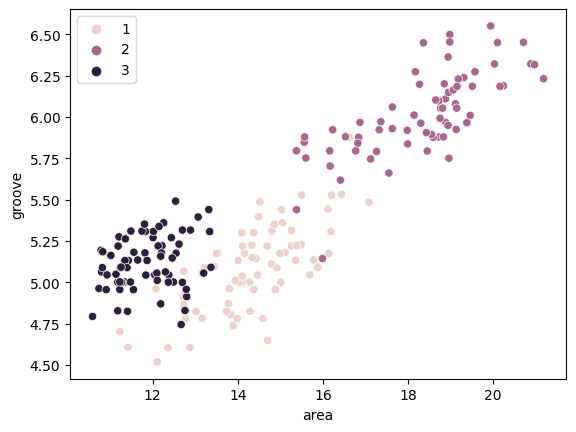

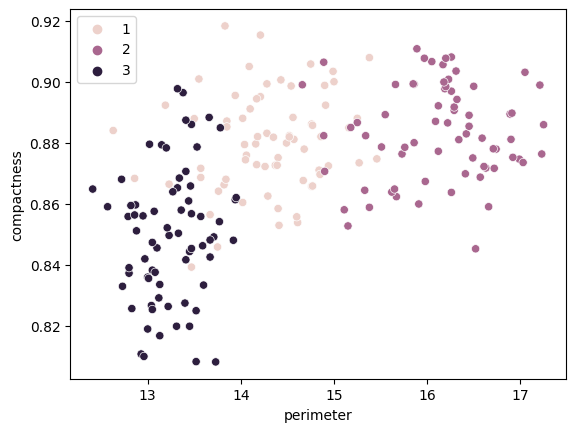

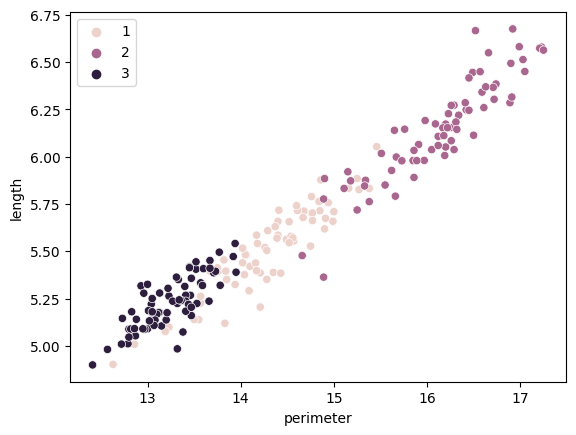

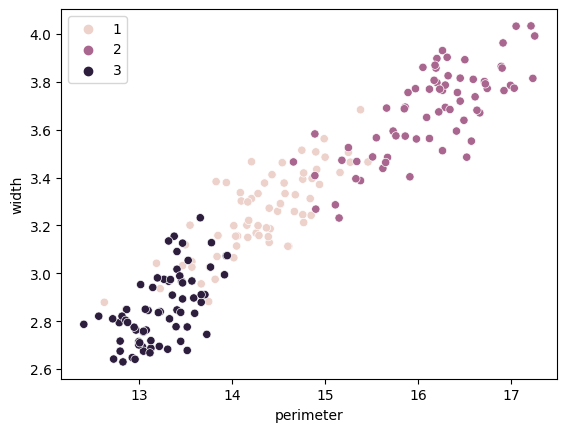

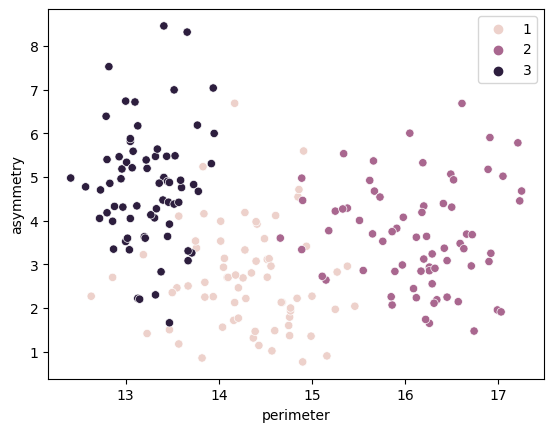

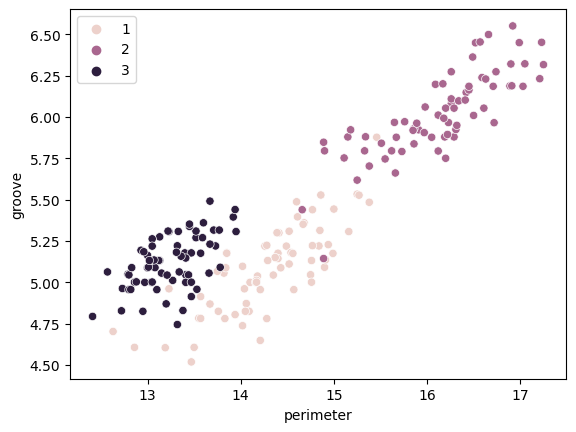

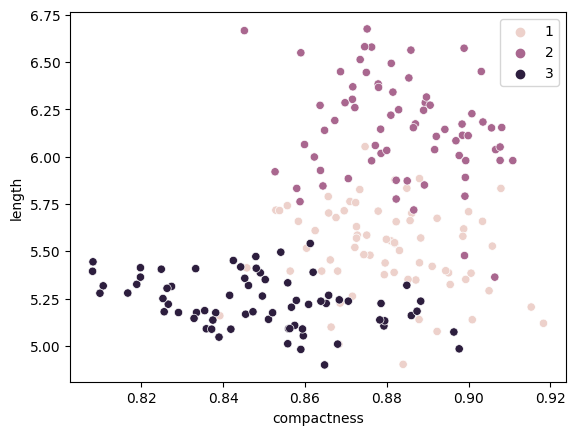

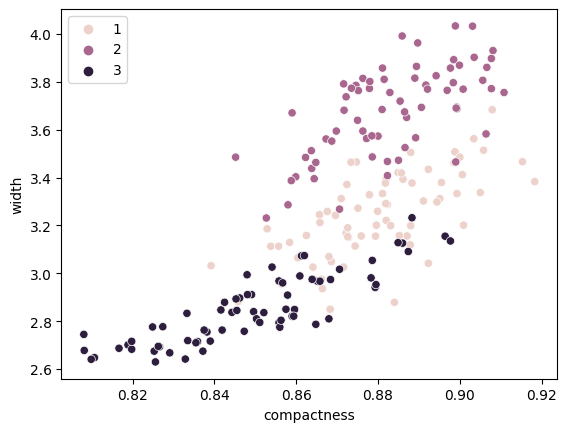

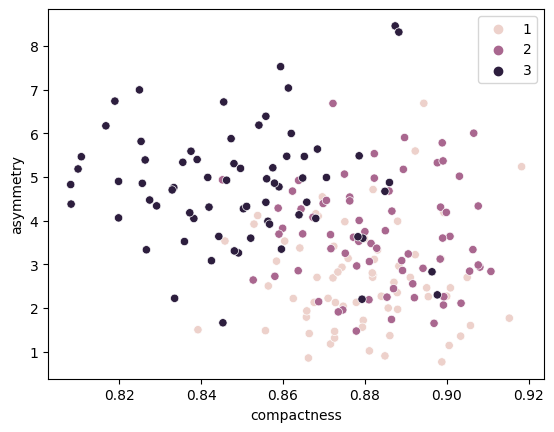

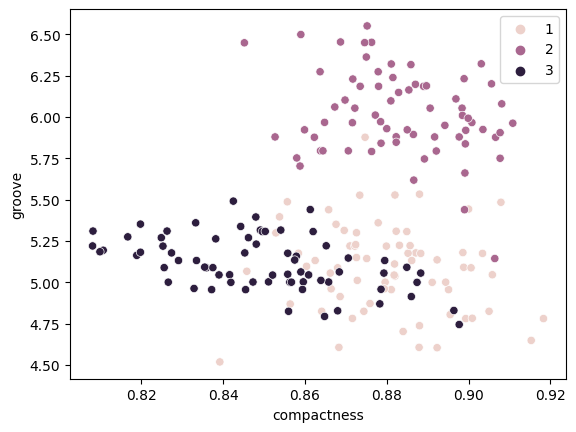

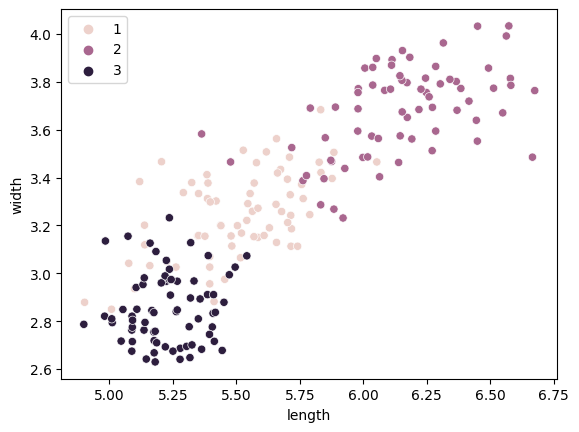

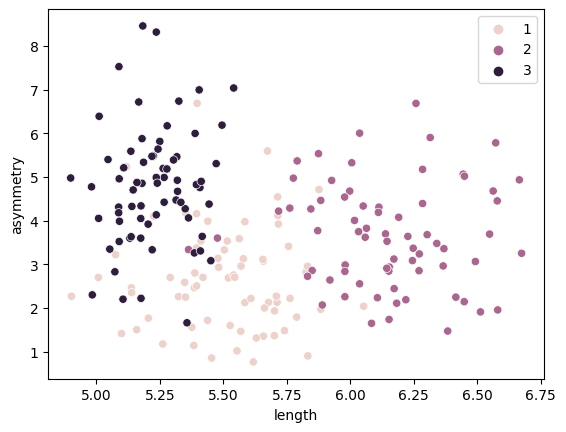

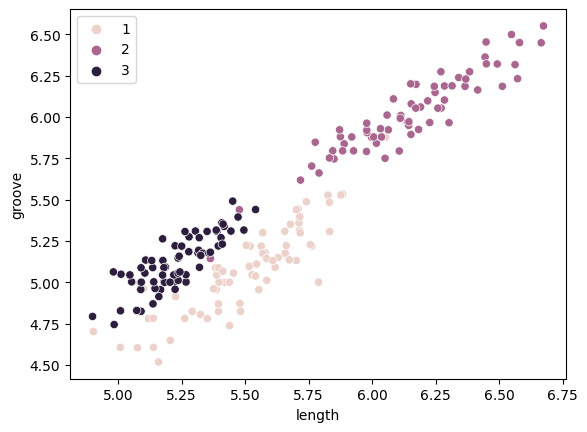

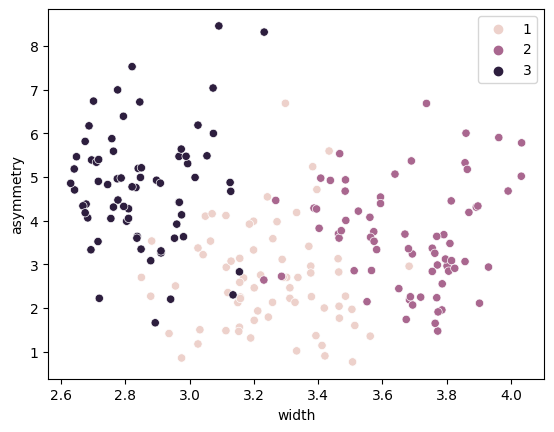

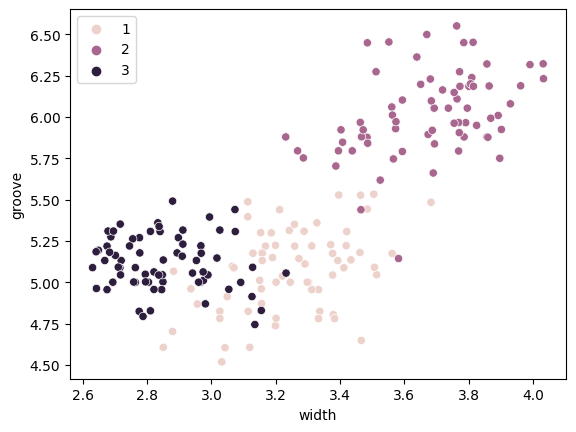

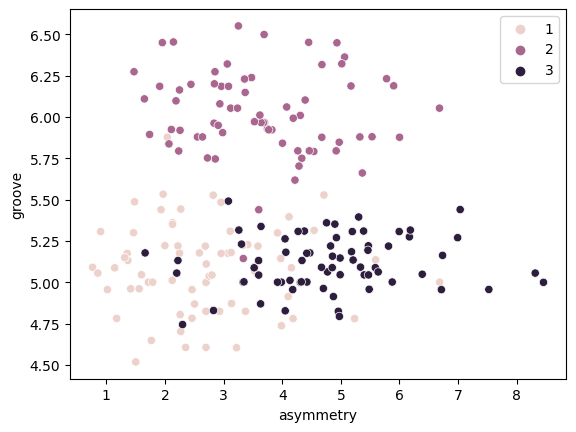

In [ ]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    sns.scatterplot(x = cols[i], y = cols[j], data= df, hue = 'class')
    plt.legend()
    plt.show()

##SECTION 2.1: Clustering

First, we will try to use K-means on only 2 variables--which happen to be the most chaotic as well--to see how they predict the data.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x1 = 'compactness'  #Feature 1
x2 = 'asymmetry'    #Feature 2
X = df[[x1,x2]].values  #Both features in one

In [ ]:
kmeans = KMeans(n_clusters = 3, n_init = 'auto').fit(X)
clusters = kmeans.labels_   #Get current clusters
print("predicted clusters:\n", clusters)  #Print the predicted classes

predicted clusters:
 [1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 2 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 1 2 1 1 1 0 1 1 1 1 1 1 0 2 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 0 2 1 2 2 2 1 1 1 1 0 2 0 1 1 0 2 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
 0 1 2 0 1 0 1 0 1 2 0 0 1 0 0 0 1 1 2 1 1 0 0 0 0 0 1 1 0 2 2 2 2 0 2 1 0
 0 2 2 2 0 0 0 2 0 0 0 2 1 0 0 0 2 1 0 0 0 0 2 2 0 2 2 0 2 0 2 1 0 0 0 2 2
 0 0 0 2 0 2 0 0 0 0 0 2 0 0 1 2 1 0 2 0 0 0 2 0 2]


In [ ]:
print("actual classes:\n", df['class'].values)  #Print the actual classes

actual classes:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


Since the predicted classes are 0,1,2 and not 1,2,3 then we will need to map the values from predicted to the actual classes. For now, we will just focus on visualizing performance.

In [ ]:
clusters_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x1,x2,'class'])

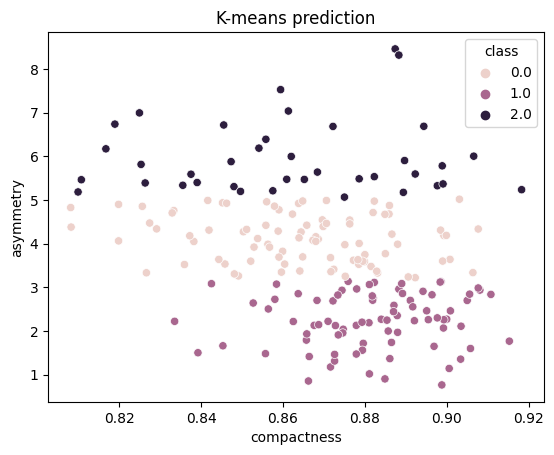

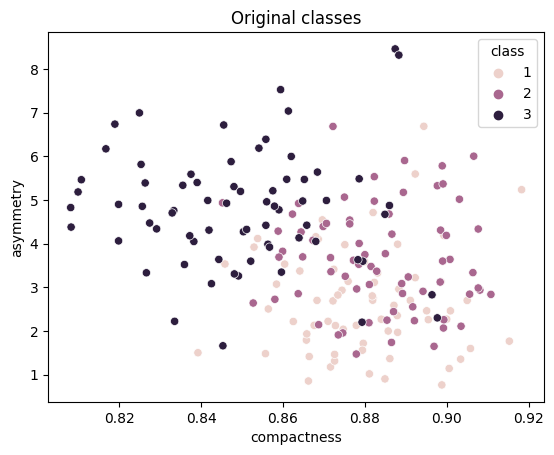

In [ ]:
#K-means prediction
sns.scatterplot(x=x1, y=x2, data=clusters_df, hue='class')
plt.title('K-means prediction')
plt.show()

#Original classes
sns.scatterplot(x=x1, y=x2, data=df, hue='class')
plt.title('Original classes')
plt.show()

The graphs show that K-means clustering is very weak on predicting the classes given the variables compactness and asymmetry. This is not surprising since this set of variables have data points that clearly overlap between classes and is hard to distinguish a class from the others.

NOTE: In Section 1 we discovered through hypothesis testing that variables such as compactness made it hard to tell the difference between classes. For now, we will ignore that fact and continue with making a model with all features. We will go through it in Section 3.

##SECTION 2.2: Clustering in Higher Dimensions

Using 2 variables did not seem to be efficient enough to predict the classes. Consequently, we will use all features to see how the prediction improves

In [ ]:
X = df[cols[:-1]].values  #Features
kmeans = KMeans(n_clusters=3, n_init='auto').fit(X)  #Fitting all features to k-means
clusters = kmeans.labels_   #Getting the current clusters
clusters_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))), columns=df.columns)   #Make a dataframe to keep track
clusters_df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2.0


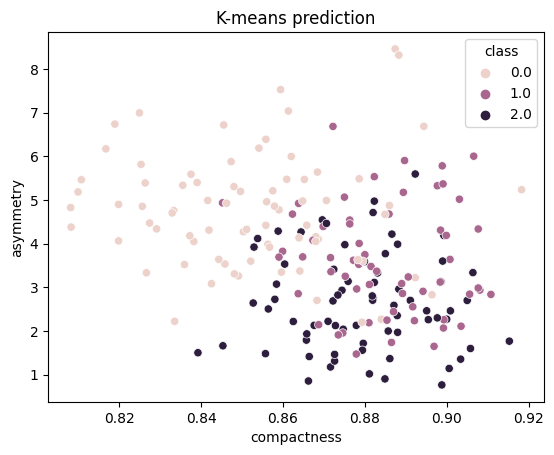

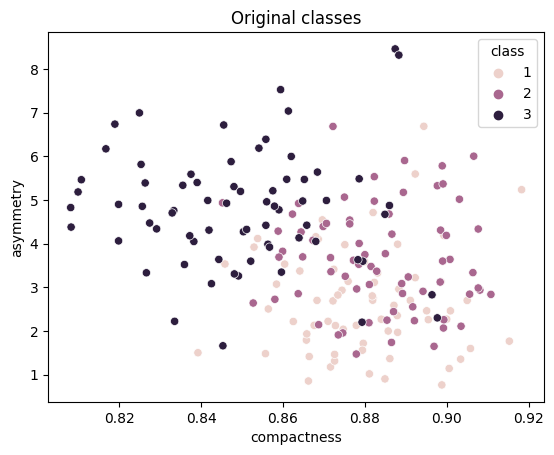

In [ ]:
#K-means prediction (higher dimension)
sns.scatterplot(x=x1, y=x2, data=clusters_df, hue='class')
plt.title('K-means prediction')
plt.show()

#Original classes (higher dimension)
sns.scatterplot(x=x1, y=x2, data=df, hue='class')
plt.title('Original classes')
plt.show()

The model displays a massive improvement when using a few more features to learn the pattern. It would be useful to see a classification report to understand more details. Additionally, we need to map the predicted classes to the actual classes.

In [ ]:
#Map values to corresponding classes
for index in clusters_df.index:
  if clusters_df.loc[index]['class'] == 1.0:
    clusters_df.loc[index]['class'] = 2
  elif clusters_df.loc[index]['class'] == 2.0:
    clusters_df.loc[index]['class'] = 1
  elif clusters_df.loc[index]['class'] == 0.0:
    clusters_df.loc[index]['class'] = 3

#Print report
print(classification_report(df['class'].values, clusters_df['class'].values))

              precision    recall  f1-score   support

           1       0.83      0.86      0.85        70
           2       0.98      0.86      0.92        70
           3       0.88      0.97      0.93        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210



Based on the report, it is evident that the model is very strong in predicting the classes

##SECTION 2.3: PCA and k-means

Visualizing the data with more than 3 features is impossible to do in a single graph. 7 features imply 7 dimensions, and we cannot visualize that. To solve this, it is good to use PCA to visualize multivariate data on a projection of two or three components. In other words, being able to visualize the data in 2D.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)   #Set components to 2
transformed_x = pca.fit_transform(X)    #Fit and transform the data

#Print shapes of data
print("original shape: ", X.shape)
print("transformed shape: ", transformed_x.shape)

original shape:  (210, 7)
transformed shape:  (210, 2)


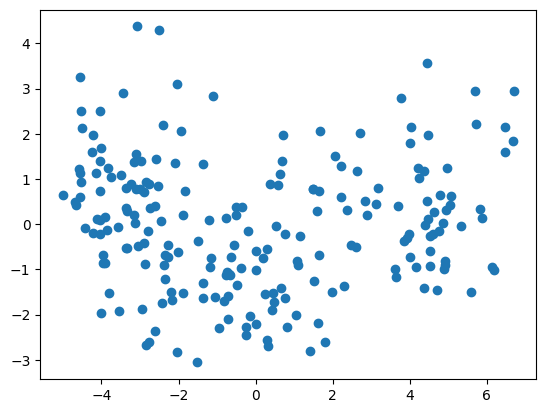

In [ ]:
#Display data in 2D with components that explain most of the variance
plt.scatter(transformed_x[:,0], transformed_x[:,1])
plt.show()

In [ ]:
#Create a dataframe for predictive model and actual values
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x, clusters.reshape(-1,1))), columns=['pca1', 'pca2', 'class'])
truth_pca_df = pd.DataFrame(np.hstack((transformed_x, df['class'].values.reshape(-1,1))), columns=['pca1', 'pca2', 'class'])

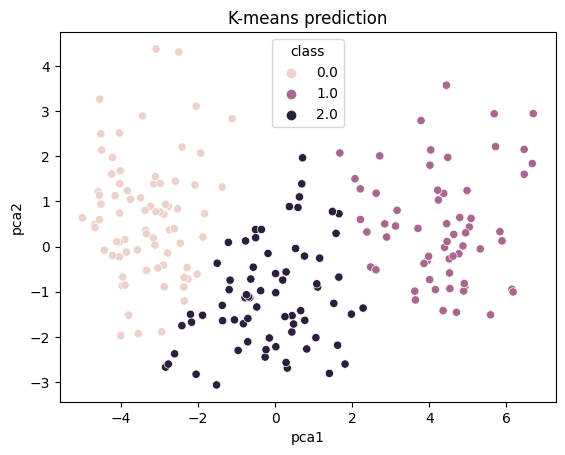

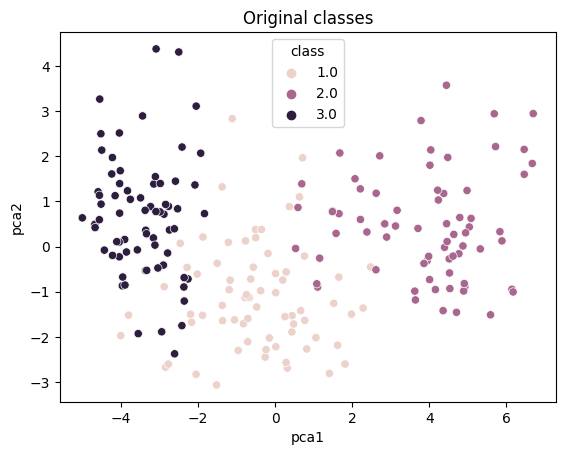

In [ ]:
#K-means prediction (higher dimension)
sns.scatterplot(x='pca1', y='pca2', data=kmeans_pca_df, hue='class')
plt.title('K-means prediction')
plt.show()
#Original classes (higher dimension)
sns.scatterplot(x='pca1', y='pca2', data=truth_pca_df, hue='class')
plt.title('Original classes')
plt.show()

Visualizing the data using PCA makes it efficient to see everything at once and identify patterns. Compared to other graphs, the current components explain the difference of classes in a 2D scatterplot. Using PCA does not change the performance of the model! It just enhances visualization of multivariate data. As you can see in the classification report from below, the results are the same.

In [ ]:
#Map values to corresponding classes
for index in kmeans_pca_df.index:
  if kmeans_pca_df.loc[index]['class'] == 1.0:
    kmeans_pca_df.loc[index]['class'] = 2
  elif kmeans_pca_df.loc[index]['class'] == 2.0:
    kmeans_pca_df.loc[index]['class'] = 1
  elif kmeans_pca_df.loc[index]['class'] == 0.0:
    kmeans_pca_df.loc[index]['class'] = 3

#Print report
print(classification_report(df['class'].values, kmeans_pca_df['class'].values))

              precision    recall  f1-score   support

           1       0.83      0.86      0.85        70
           2       0.98      0.86      0.92        70
           3       0.88      0.97      0.93        70

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210



#SECTION 3: Statistics and Machine Learning for Analysis

As discussed in Section 1, there were variables that had significant differences between classes. In Section 2, we discussed how to classify classes by using the K-means algorithm and use PCA to visualize 7 features in a single graph. Now, in Section 3, we will experiment to see how significant were the results, and how they can be used together to understand data in detail.

##SECTION 3.1: Analysis of results from Hypothesis Testing
Recall that in Section 1.2 we identified which variables had the most significant differences between classes. In the table below from 'results' we will identify the cases that rejected the null hypothesis to suggest a statistically significant difference between classes.

In [ ]:
results

,population1,population2,pvalue,result_H0
0,area1,area2,4.698866e-37,reject
1,area1,area3,1.289590e-27,reject
2,area2,area3,7.923592e-57,reject
3,perimeter1,perimeter2,1.586238e-38,reject
4,perimeter1,perimeter3,2.805320e-24,reject
5,perimeter2,perimeter3,1.118361e-59,reject
6,compactness1,compactness2,2.003497e-01,fail
7,compactness1,compactness3,2.083529e-16,reject
8,compactness2,compactness3,2.612794e-19,reject
9,length1,length2,7.888859e-31,reject


The following failed to reject the null hypothesis:
- Compactness1 and Compactness2
- Groove1 and Groove3

This means that there was not a statistical significance between the classes in the given variable (e.g., no difference in the compactness of class 1 and class 3). The rest of the cases, however, rejected the null hypothesis, which implied that there was statistical significance in the difference of the classes.

The ones with generally the most significant differences were area, perimeter, and width. If you were to use only one of this variables to predict the class of a sample, you would be highly likely to succeed due to the significant difference between them.

This does not necessarily mean, though, that combining the 3 of them will make a better prediction (we will demonstrate this soon). The T-tests only help identify the differences in a pair of classes, and by doing the tests with all possible pairs within a variable would help identify a more general perspective in differences. The lowest p-values were found in area and perimeter, which means that the likelihood of identifying a difference between all 3 classes is very high with those variables.

##SECTION 3.2: Analysis of Results from K-means

In Section 2, we saw how powerful it could be to use all variables instead of 2 to predict the classes. But that might not always be the case. What about considering the other combinations? Would area, groove, and compactness make a better prediction? What about width, length, asymmetry, and perimeter at once? We could have tried a variety of combinations to find the best predictive model. In fact, we will analyze all possible combinations to see how well they perform compared to the other models.

First, we need a function that maps the values from k-means to the correct class. To map the values, the best statistical metric to predict the class is the mode. This is because,
- The possible values are discrete; it would not be appropriate to use the mean
- The most repeated class in a cluster would say that the cluster is good at predicting a specific value, so the set would need to be mapped to the respective class it is trying to predict. Therefore, the median might be ambiguous in this aspect.
- If we happen to get the same mode in two or three different clusters, that would imply that the model is not that good at classifying. Additionally, this will result in a lower accuracy score, which is logical in this scenario.


In [ ]:
#Function to map values
def map_values(kmeans_labels):
  mode1 = stats.mode(kmeans_labels[:70])[0]      #Map to class 1
  mode2 = stats.mode(kmeans_labels[70:140])[0]   #Map to class 2
  mode3 = stats.mode(kmeans_labels[140:210])[0]  #Map to class 3
  return [1 if x==mode1 else 2 if x==mode2 else 3 for x in kmeans_labels]

Now, we will use all possible combinations to see the difference in performance when using certain variables in the predictive model:

In [ ]:
#Dictionary to make a dataframe at the end
data_dict = {'variables': [],
             'accuracy': []}

#c stands for 'Choose' in combinatorics: the number of items in a combination
for c in range(1,7+1):
  var_comb = list(combinations(df.columns[:-1],c))  #Make tuples of combinations with c items
  for comb in var_comb:  #Get tuples with variables of combinations
    comb = list(comb)     #Turn the tuple into a list

    #Variables
    variables = comb
    X = df[variables]

    #K-means model
    kmeans = KMeans(n_clusters = 3, n_init='auto').fit(X)

    #Map values to corresponding classes
    kmeans_labels = map_values(kmeans.labels_)

    #Save accuracy and variables in dictionary
    accuracy = classification_report(df['class'].values, kmeans_labels, output_dict=True, zero_division=True)['accuracy']
    data_dict['variables'].extend([variables])
    data_dict['accuracy'].extend([round(accuracy,4)])

accuracy_df = pd.DataFrame(data_dict)   #Make a DataFrame from the obtained values
accuracy_df.sort_values(by='accuracy', ascending=False)   #Sort based on accuracy in descending order

,variables,accuracy
126,"[area, perimeter, compactness, length, width, ...",0.8952
42,"[area, asymmetry, groove]",0.8952
107,"[area, perimeter, width, asymmetry, groove]",0.8952
104,"[area, perimeter, length, width, asymmetry]",0.8952
103,"[area, perimeter, compactness, asymmetry, groove]",0.8952
...,...,...
23,"[length, asymmetry]",0.5524
62,"[width, asymmetry, groove]",0.5381
59,"[length, width, asymmetry]",0.5286
26,"[width, groove]",0.5048


The top 23 combinations displayed in the table contain the same amount of accuracy; any of those combinations would be considered good to be used in the model. The worse combinations are at the end of the table, which trivially imply that they are weak for the predictive model.

##SECTION 3.3: Connecting K-means and Hypothesis Testing for Analysis

As described in Section 3.1, area and perimeter were the best variables to classify classes in the data. In fact, the results from K-means clustering show more evidence with the top 23 combinations of variables ALL including area, and most of them including the perimeter. What might seem surprising is that compactness and groove are included in a few of the combinations. This might be due to a few reasons:
- Assume there are two different variables: x1 and x2. Even though variable x1 has no significant difference between class 1 and class 2, there is another variable x2 with significant difference between those classes, which may help determine the difference that x1 was not able to discern. Take Groove as an example: it fails to tell a difference between class 1 and class 3; therefore, when it is the only predictor, its score is weak (which was anticipated in Section 1 through hypothesis testing). However, the measure of Groove is very useful in determining a difference between class 1 and class 2. Now consider width, which is fairly good at classifying class 1 and class 2. Putting both together result in better chances of classifying classes correctly, and they turn their weaknesses into a strength. This is evident in the table above at index 26.
- One or a few of the variables 'carry the group' of combinations. Take area and groove as an example: area is highly efficient in determining the difference with an accuracy score of (0.84) while groove is weak with a score of (0.65). Now, if you combine both of them, you will get a score of (0.84), which does not improve with respect to the score of the area. Even though the score of groove was low, since area was good at determining a difference it will help groove appear in the top of the list even though it did not improve accuracy at all; it was the area the variable responsible for such a high score.



Hypothesis Testing is a powerful tool to analyze and demonstrate evidence of significant differences between variables, distributions, and groups. The K-means clustering method is useful in identifying patterns and classifies them into partitions and clusters. Using both tools in analysis provide evidence for stronger conclusions and insights on what variables are good at classifying, why they are good, and how they contribute to a prediction.

In this project, we were able to
- Analyze variables
- Find evidence in differences of groups
- Implement a classification model
- Predict the class of a sample
- Infer powerful and detailed conclusions

-Erick Tapia